<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos usando gxp y pickle.

In [ ]:
import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()

In [ ]:
print( train[0].shape, train[1].shape )

(50000, 784) (50000,)


Tenemos 50000 arreglos de 784 entradas cada uno, el cual representa un número el cual se puede observar con el siguiente código:

clase:  5


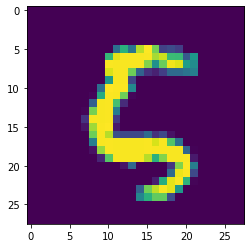

In [ ]:
idimg = 2000

im =  train[0][idimg].reshape(-1, 28) #train[0] es una matriz,
#train[0][5000] es un vector de longitud 784
#reshape(-1,28) significa crea una matriz de k x 28 tal que k*28=784
plt.imshow(im)#Plotealo como imagen.
print('clase: ', train[1][idimg])

train[1][k] guarda el número que representa el respectivo train[0][k].

------------------------------------------------

Implementación del descenso de gradiente.

Consideramos el tamaño de paso $\alpha_k=\frac{d_k^Td_k}{d_k^THd_k}$

In [ ]:
def get_alpha_k(x,d,H):#Si tenemos H la matriz Hessiana.
    top=np.linalg.norm(d)
    bottom=np.dot(d,np.dot(H,d))
    return (top/bottom)

Nuestra función de descenso recibe una condición inicial $x_0$, la función a minimizar, el gradiente y Hessiano de la misma, y hay parámetros opcionales para tolerancia del gradiente y número máximo de iteraciones, así como un parámetro (False por default) que grafica el valor de $f(x_k)$ y $||g_k||$.

In [ ]:
def Steepest_descent(x_0,f,grad_f,Hessian_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
    x_1=x_0-alpha_k*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
        x_1=x_0-alpha_k*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1),"   ","f(x_k)= ",str(f(x_1)))
    else:
        L=0
        plt.plot(range(L+1,len(F)),F[L:-1])#Posterior convergence
        plt.title("k vs. F(X_k)")   
        plt.show()         
        plt.plot(range(L+1,len(G)),G[L:-1])
        plt.title("k vs. ||g(X_k)||")   
        plt.show()
    print("iterations: ",k)
    return (x_1)

Definimos $f$, $\nabla f$ y $H_f$ para el problema.

Primero seleccionamos un subconjunto de los datos, tales que $y\in\{0,1\}$.

In [131]:
import random

In [154]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]
np.random.seed(0)
u=np.random.randint(0,5000,200)
x=x[u]
np.random.seed(0)
y=y[np.random.randint(0,5000,200)]
n=len(x)

In [155]:
x_plus=np.c_[x,np.ones(n)]
x_plus.shape

(200, 785)

In [142]:
def pi_i(i,b,b_0):
    u=np.dot(x[i],b)
    a=1+np.exp(-u-b_0)
    return (1/a)

In [143]:
def h(b_and_b_0):
    b=b_and_b_0[0:-1]
    b_0=b_and_b_0[-1]
    suma=0
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        suma+=y[i]*np.log(p_i)+(1-y[i])*np.log(1-p_i)
    return suma

In [144]:
def grad_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_g=np.zeros(len(b_and_b_0))
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        suma_g+=(y[i]/p_i)-(1-y[i])*(1/(1-p_i))*(-((p_i**(-1)-1)/p_i**2))*x_plus[i]
    return suma_g

In [145]:
def Hessian_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_h=np.zeros((len(b_and_b_0),len(b_and_b_0)))
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        common_exp=p_i**(-1)-1
        suma_h+=np.outer(x_plus[i],x_plus[i])*(common_exp*(-(common_exp+1)**2+2*(common_exp+1)))*p_i**4
    return suma_h

In [120]:
pi_i(i=1,b=np.ones(784)*0.005,b_0=1)

0.9872158134167734

In [146]:
grad_h(np.ones(785)*0.005)

array([18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85197201,
       18.85197201, 18.85197201, 18.85197201, 18.85197201, 18.85

In [156]:
loc_min=Steepest_descent(x_0=np.ones(785)*0.005,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.0001,max_iter=1000,pr='True')

Initial approximation:  [0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005 0.005
 0.005 0.005 0.005 0.005 0.

In [157]:
print(loc_min)

[-8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02 -8.35083787e-02
 -8.35083787e-02 -8.35083

In [158]:
#Guardar la solucion
fo = open(f"b_0.txt", "w")
fo.write(str(785)+"\n")#Add size
np.savetxt(fo, loc_min, fmt='%1.9e', comments='')
fo.close()